# Object Oriented Programming

You already know a variety of types, including dicts, lists, and pandas DataFrames.  You already know how to create objects (or instances) of these types.

Now, we will learn about Object Oriented Programming, or OOP.  We will not only create new objects; we will now create our own types, and then create instances of those new types.  The new types we'll be creating are called *classes*.  There are other ways to create new types in Python (for example, maybe you have encountered `namedtuple` -- no worries if not), but classes are by far the most common way.

## Analogy to Dictionaries

The Python dict is the most flexible type we know so far.  By using different keys/values, we can represent a variety of different real world entities, including people, vehicles, sales, movies, games, etc.

Let's see how we could create a couple dictionaries to represent people, then look at the PythonTutor visualization of those dict objects...

In [1]:
#person-dict.png
p1 = {"first":"Alice", "last":"Anderson", "age":24}
p2 = {"first":"Bob", "last":"Bryson", "age":23}

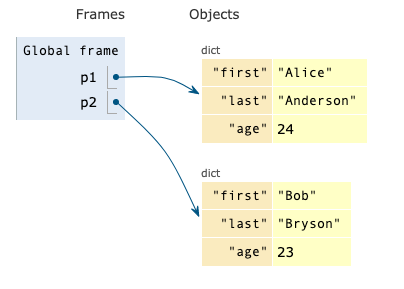

In [2]:
from IPython.core.display import Image
Image("person-dict.png")

When we create a new type (as a Python class), then create instances from that new type, the resulting objects are remarkably similar to dictionary objects.  Without worrying about the code (which has a number of thing yet unexplained), let's see how some objects used to represent people are similar to the above dictionaries.

In [3]:
#person-class.png
class Person:
    def __init__(self, first, last, age):
        self.first = first
        self.last = last
        self.age = age
        
p1 = Person("Alice", "Anderson", 24)
p2 = Person("Bob", "Bryson", 23)

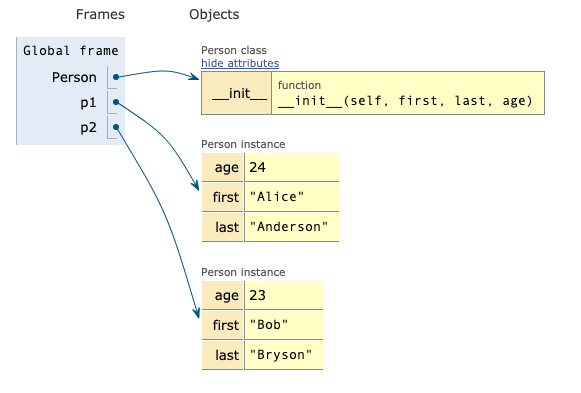

In [4]:
Image("person-class.png")

Spend a few moments to see how many differences you can see between the above two diagrams.

With dictionaries, we have **keys** and **values** (for example, "age" and 24, respectively).  With objects created from a class, the analogous features are called **attribute names** and **attribute values**.

## Classes and Attributes

At a minimum, we can create class with two lines, as in the following example (remember that `pass` is a placeholder that does nothing -- we'll eventually write a lot of code inside classes):

In [5]:
# create a new type
class Person:
    pass

# create an instance of that new type
p = Person()

With dictionaries, we use brackets ("[" and "]") to update values.  With objects from classes, we use the "." operator.

In [6]:
#update.png
d = {}
d["first"] = "Alice"

class Person:
    pass

p = Person()
p.first = "Alice"

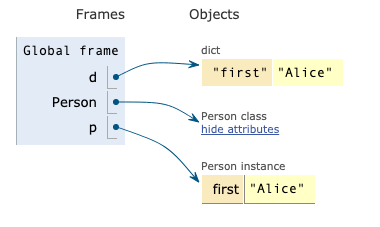

In [7]:
Image("update.png")

Attribute names are a little more restrictive than dictionary keys.  Only things that would be valid variable names work as attribute names.  In contrast, keys can contain spaces and special characters (or, a dictionary key might be an int, or some other non-string type!).

The restrictions on attribute names provide an advantage: we don't put quotes around attribute names (and indeed, Python wouldn't let us if we tried).

## Functions and Methods

It often makes sense to have a few functions related to the same type of data.  Let's see an example with dictionaries.

In [8]:
#dict-functions.png
p1 = {"first":"Alice", "last":"Anderson", "age":24}
p2 = {"first":"Bob", "last":"Bryson", "age":23}

def birthday(d):
    d["age"] += 1

def full(d):
    return d["first"] + " " + d["last"]

birthday(p2)
birthday(p2)

print(full(p1) + " is " + str(p1["age"]) + " years old")
print(full(p2) + " is " + str(p2["age"]) + " years old")

Alice Anderson is 24 years old
Bob Bryson is 25 years old


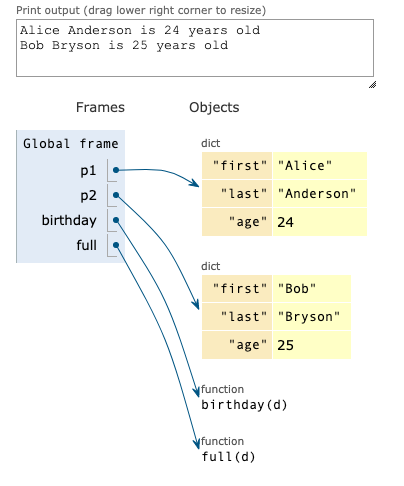

In [9]:
Image("dict-functions.png")

When we have such functions designed to operate on objects of a given type, we can put those functions inside the class itself.  When we do, those functions are called *methods*.  We can call methods inside a class like this:  `classname.methodname(arguments...)`.  This is uncommon, but easy to understand (we'll soon learn a shortcut with some advantages that is a bit unintuitive at first).

In [10]:
#methods1.png
class Person:
    def birthday(somebody):
        somebody.age += 1

    def full(somebody):
        return somebody.first + " " + somebody.last

p = Person()
p.first = "Alice"
p.last = "Anderson"
p.age = 24

Person.birthday(p)
print(Person.full(p) + " is " + str(p.age) + " years old")

Alice Anderson is 25 years old


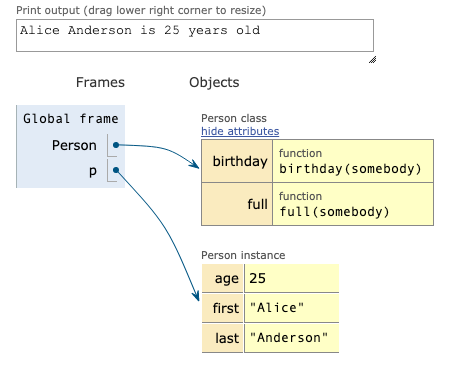

In [11]:
Image("methods1.png")

Ok, here's the shortcut that is almost always used with methods:

`p.birthday()` is the same as `Person.birthday(p)`

Python is able to convert the simpler form to the full version because it can lookup the type of `p` and figure out it is a `Person`.

In [12]:
type(p)

__main__.Person

One implication is that `p.birthday()` is actually passing in one argument (`p`), even though it may not be obvious.  The parameter that `p` is passed to is called the *receiver*.  Our receiver above is named `somebody`, but it is conventional to call it `self`.  Let's redo the above example, using proper OOP style, and adding a second person:

In [13]:
#methods2.png 7
class Person:
    def birthday(self):
        self.age += 1

    def full(self):
        return self.first + " " + self.last

p1 = Person()
p1.first = "Alice"
p1.last = "Anderson"
p1.age = 24

p2 = Person()
p2.first = "Bob"
p2.last = "Bryson"
p2.age = 20

p1.birthday()
print(p1.full() + " is " + str(p1.age) + " years old")

Alice Anderson is 25 years old


The following diagram shows the stack while the `full` method executes.  We called `p1.full()`, so `self` and `p1` point to the same object (if we had called `p2.full()`, then `self` would point to the same object as `p2`).

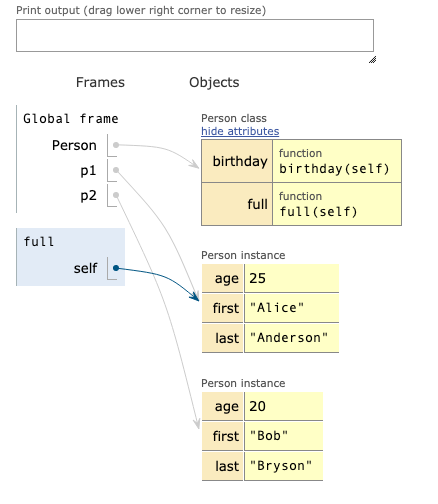

In [14]:
Image("methods2.png")

## Constructors

We've been creating new instances of our `Person` type with `Person()`.  If we like, we can pass in arguments when we create a new object, like `Person("Alice", "Anderson", 24)`.  When we do, the new object as well as those arguments get passed to the parameters of a special methods called the *constructor*.  In Python, constructors must be named `__init__`.

Let's create a construction for `Person`.

In [15]:
#constructor.png 5 2
class Person:
    def __init__(self, first, last, age):
        self.first = first
        self.last = last
        self.age = age
    
    def birthday(self):
        self.age += 1

    def full(self):
        return self.first + " " + self.last

p1 = Person("Alice", "Anderson", 24)
p2 = Person("Bob", "Bryson", 25)

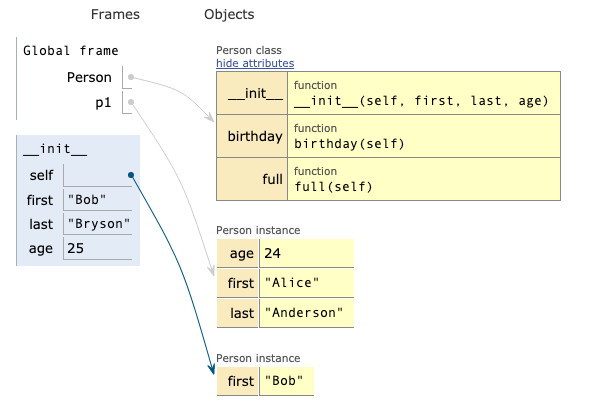

In [16]:
Image("constructor.png")

In constructors, lines like `self.something = something` are common.  The idea is to copy the values passed to the parameters over to attributes, to initialize the object.  In the above diagram, `Person("Bob", "Bryson", 25)` is currently executing.  You can see that only the `first` attribute has been created so far, and the `p2` variable doesn't even exist yet.  As the code continues to run, `last` and `age` will also be initialized for the new object, and then `p2` will refer to it (much like has already been done for `p1` and the object to which it refers). 

## Summary

When we have many dictionaries with the same keys representing the same kind of entity, it often makes sense to create a *class* for entity.  Attributes for *objects* created from the new class can replace keys and values in our previous dictionaries.  If we like, we can create functions inside our class, called methods.  If `obj` is of type `myclass`, `obj.meth()` calls the `meth` method in the `myclass` class.  Surprisingly, the method has one parameter, to which `obj` is automatically passed.  If we like, we can create a special `__init__` method, the constructor.  This method will be called whenever a new instance of a class is created, and it will often be used to populate the attributes for the new object.